In [35]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [49]:
heart = pd.read_csv('heart.csv')

In [50]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
o2 = pd.read_csv('o2Saturation.csv')

In [39]:
o2.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [40]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
names = pd.DataFrame(data=['Wiek', 'Plec', 'Typ bolu w klatce piersiowej', 'Spoczynkowe cisnienie krwi(in mm Hg)', 'Cholesterol w mg/dl pobrany z BMI', '(Cukier we krwi naczczo > 120 mg/dl) (1 = true; 0 = false)', 
                           'Spoczynkowe wyniki elektrokardiograficzne', 'Maksymalne tętno', 'Dławica wysiłkowa (1 = yes; 0 = no)', 'Poprzedni szczyt', 'Nachylenie/Pochylenie(Slope)', 'Liczba głównych naczyń krwionośnych (0-3)', 'Niedokrwistość tarczowatokrwinkowa'])

In [53]:
names.head(13)

,0
0,Wiek
1,Plec
2,Typ bolu w klatce piersiowej
3,Spoczynkowe cisnienie krwi(in mm Hg)
4,Cholesterol w mg/dl pobrany z BMI
5,(Cukier we krwi naczczo > 120 mg/dl) (1 = true...
6,Spoczynkowe wyniki elektrokardiograficzne
7,Maksymalne tętno
8,Dławica wysiłkowa (1 = yes; 0 = no)
9,Poprzedni szczyt


In [54]:
%matplotlib inline  
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
corrmat = heart.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

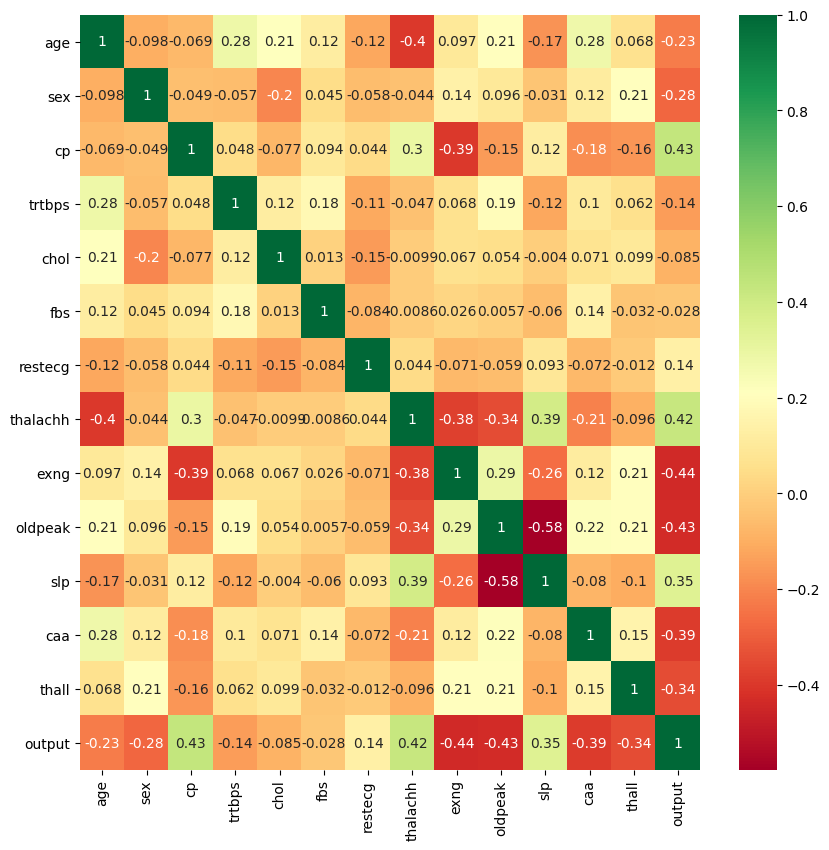

In [56]:
hm = sns.heatmap(heart[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [57]:
heart1 = heart
heart1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
cat_cols = ['cp', 'restecg', 'slp', 'thall']

prefixes = {col: col for col in cat_cols}

one_hot_data = pd.get_dummies(data=heart1, prefix=prefixes, columns=cat_cols)

one_hot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trtbps     303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalachh   303 non-null    int64  
 6   exng       303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   caa        303 non-null    int64  
 9   output     303 non-null    int64  
 10  cp_0       303 non-null    uint8  
 11  cp_1       303 non-null    uint8  
 12  cp_2       303 non-null    uint8  
 13  cp_3       303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  slp_0      303 non-null    uint8  
 18  slp_1      303 non-null    uint8  
 19  slp_2      303 non-null    uint8  
 20  thall_0   

In [60]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

y = heart1.pop('output')
X = heart1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_metrics(y_true, y_pred):
    acc = round(accuracy_score(y_true, y_pred), 2)
    prec = round(precision_score(y_true, y_pred), 2)
    reccall = round(recall_score(y_true, y_pred), 2)
    print(acc, "\n", prec, "\n", reccall)

In [65]:
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

0.85 
 0.84 
 0.91
